### Assignment 1

##### Problem 2.4
Show that the eigenvalues of `inv(B)*A` are real

In [1]:
using LinearAlgebra
A = rand(5,5);
A = A + A';  # A is a Hermitian matrix
B = rand(5,5);
B = B*B'; # B is a positive definite Hermitian matrix
lambda, X = eigen(inv(B)*A);
print(lambda)

[281.158, 13.4319, -3.7709, 0.248504, 2.57096]

Clearly, each eigenvalue does not have an imaginary component.

Now show that the eigenvectors are not orthagonal.

In [2]:
X'*X

5×5 Array{Float64,2}:
  1.0       -0.549482   0.653192   0.913495   0.415887
 -0.549482   1.0       -0.79271   -0.526053  -0.427778
  0.653192  -0.79271    1.0        0.595838   0.69737 
  0.913495  -0.526053   0.595838   1.0        0.410459
  0.415887  -0.427778   0.69737    0.410459   1.0     

This matrix should be diagonal if the vectors were othogonal, thus, they are not.

-----------------------------
##### Problem 2.5

Show that the elements of `C = X'*B*X` are a kind of dot product of the eigenvectors with a factor of B in the middle.

In [3]:
C = X'*B*X

5×5 Array{Float64,2}:
  0.00231767   -6.50521e-17   9.17235e-17   2.00008e-16   1.06685e-16
 -8.23994e-17   0.0329623     4.16334e-17   2.14932e-15  -5.93275e-16
  1.40513e-16   4.33681e-17   0.0383982     2.09325e-14  -1.73472e-15
  1.66533e-16   2.16493e-15   2.07889e-14   0.752216     -2.83107e-14
  8.50015e-17  -5.6205e-16   -1.76595e-15  -2.8256e-14    0.203998   

This matrix is diagonal (1e-16 is basically zero).

-------------
##### Problem 5.2

$\hat{u}'(x) = \frac{-u(x+2\Delta x) + c\cdot u(x + \Delta x) - c\cdot u(x - \Delta x) + u(x - 2\Delta x)}{d \cdot \Delta x}$

$\hat{u}'(x)$ is the estimated value of $u'(x)$.

Show that if $c=8$ and $d=12$, the error in estimating $\hat{u}'(x)$ is proportional to $(\Delta x)^4$ using $u(x) = $ sin$(x)$ and estimating $u'(1)$.


First, define $u$, $u'$, and $\hat{u}'$.

In [4]:
u(x::Float64) = sin(x);

u_(x::Float64) = cos(x); #derivative of sin(x)

u_est(x::Float64,dx::Float64) = (8*(u(x+dx)-u(x-dx)) + u(x-(2*dx)) - u(x+(2*dx)))/(12*dx);

Calculate the error in estimating $u'$ using a range of $\Delta x$'s from $10^{-12}$ to $10^{-3}$.

In [5]:
dxs = range(-8,stop=-1,length=101); #dx powers to be tested

errors = zeros(101);
deltas = zeros(101);

i=1;
for dx in dxs
    deltas[i] = 10.0^dx;
    errors[i] = abs(u_(1.0) - u_est(1.0,10.0^dx));
    i += 1;
end

Now calculate expected error from $(\Delta x)^4$.

In [6]:
error_expected = deltas.^4;

Plot error and expected error vs $\Delta x$.

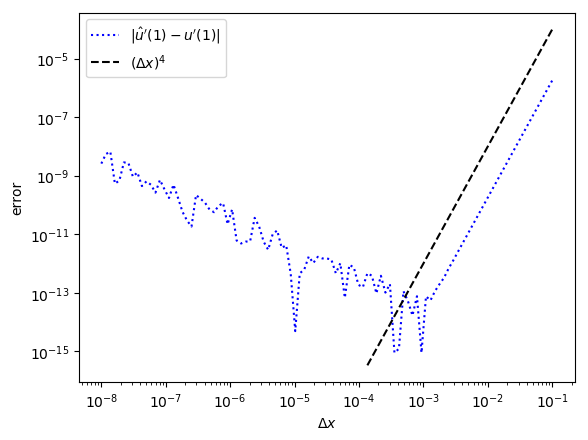

PyObject <matplotlib.legend.Legend object at 0x7f389e20eb50>

In [7]:
using PyPlot;

loglog(deltas,errors,linestyle=":",color="b",label=L"$|\hat{u}'(1) - u'(1)|$")
loglog(deltas[60:end],error_expected[60:end],linestyle="--",color="k", label=L"$(\Delta x)^4$")
xlabel(L"$\Delta x$")
ylabel("error")
legend()


Since both lines are parallel (after $10^{-3}$), the error of the estimation is proportional to $(\Delta x)^4$. The error values for $\Delta x < 10^{-3}$ do not follow this trend due to rounding off in the computer.